# FE542 Time Series Homework 2
Yuxuan Xia

## Problem 1

Basic libraries

In [68]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm

(a) Generate 2000 observations from an exponential distribution with mean 10. Report the skewness and kurtosis.

In [23]:
from statsmodels.stats.stattools import jarque_bera
def jarque_bera_test(data):
    jbres = jarque_bera(obs)
    print("JB statistic:",jbres[0])
    print("JB p-value:",jbres[1])
    print("skew:",jbres[2])
    print("kurtosis:",jbres[3])

def hist_check(data):
    plt.hist(data,normed=True)
    x=np.linspace(-3,3,100)
    y=sp.stats.norm.pdf(x)
    plt.plot(x,y,color='red')
    plt.show()

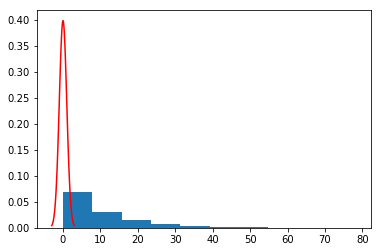

JB statistic: 60.46516029297574
JB p-value: 7.41578736531e-14
skew: -0.12724513749466718
kurtosis: 3.812906282083957


In [29]:
obs_expon = sp.stats.expon.rvs(scale=10,size=2000)
hist_check(obs_expon)
jarque_bera_test(obs_expon)

(b) Generate 2000 observations from a central t-distribution with 8 degrees of freedom. Test if the distribution of the generated numbers is normal. Use a Jarque-Berra test and a Shapiro Wilk test.

Briefly describe the later test. You do not have to use mathematical formulas only the idea of the test.

In [101]:
def shapiro_wilk_test(data):
    res = sp.stats.shapiro(obs_t)
    print("Shapiro statistc:",res[0])
    print("Shapiro p-value:",res[1])

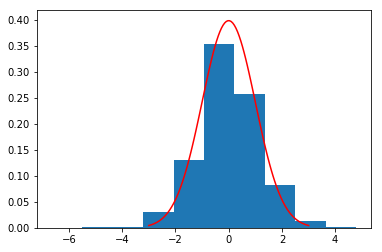

JB statistic: 60.46516029297574
JB p-value: 7.41578736531e-14
skew: -0.12724513749466718
kurtosis: 3.812906282083957
Shapiro statistc: 0.99196857213974
Shapiro p-value: 4.918607299231326e-09


In [102]:
obs_t = sp.stats.t.rvs(df=8,size=2000)
hist_check(obs_t)
jarque_bera_test(obs_t)
shapiro_wilk_test(obs_t)



From both results of Jarque Bera test and Shapiro Wilk test, the null-hypothesis (normality) is rejected under the chosen level 0.01%. So, the random variables generated from t-distribution with degrees of freedom at 8 are not normal.

Ideal: Small values of the Shapiro test statistic (i.e. W statistic) are evidence of departure from normality and percentage points for the W statistic, obtained via Monte Carlo simulations, were reproduced by Pearson and Hartley. This test has done very well in comparison studies with other goodness of fit tests.

(c) Test if the previously generated time series are independent. Use
a Ljung-Box portmanteau test.

In [277]:
from statsmodels.tsa.stattools import acf
def ljung_box_q_test(data,m,p=0):
    """p: number of efficients of your model"""
    res = acf(data,nlags=m,qstat=True)
    autocorr = res[0]
    n = len(data)
    Q = n*(n+2)*np.sum([autocorr[k]**2/(n-k) for k in range(1,m+1)])
    print("autocorrelation:",res[0])
    print("Ljung Box q statistic:",res[1])
    print("one-tailed p-value:",[0.5-abs(0.5-sp.stats.chi2.cdf(val,df=i+1-p)) 
                                 for i,val in enumerate(res[1])])
    

In [165]:
ljung_box_q_test(obs_expon,4,0)
ljung_box_q_test(obs_t,5,0)

autocorrelation: [ 1.          0.03889566 -0.01271072 -0.00187121  0.02574125]
Ljung Box q statistic: [ 3.03028541  3.35405694  3.36107734  4.69028463]
one-tailed p-value: [0.081723639788411018, 0.18692861571470631, 0.33923188257387138, 0.32057690504749936]
autocorrelation: [ 1.         -0.02080509  0.03434603  0.01131843  0.01960427 -0.01086979]
Ljung Box q statistic: [ 0.86700307  3.23102577  3.487881    4.25884636  4.49598007]
one-tailed p-value: [0.35178632244481878, 0.19878868825961227, 0.32233731976394697, 0.37210675882439703, 0.48042147094347154]


Since p-value are higher than 1%, the null hypothesis of independency is not rejected

(d) Create a new time series in the following way. If xt are the generated numbers in part a create a new time series:
$$y_t = x_t + 0.4x_{t-1} + \epsilon_t$$;
where $\epsilon_t \sim N(0; \sigma^2)$. Test if the new time series yt has independent
terms. To this end vary $\sigma$ from small (e.g., 0.1) to large. What do
you observe? Create a table to clearly display the phenomenon.

In [174]:
def gen_hybrid_time_series(xt,sigma):
    length = len(xt)-1
    eps = sp.stats.norm.rvs(loc=0,scale=sigma,size=length)
    yt=xt[1:]+0.4*xt[:-1]+eps[:]
    return yt   

In [175]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(time_series,regression):
    # determine rolling statics
    rolmean = pd.rolling_mean(time_series,window=200)
    rolstd = pd.rolling_std(time_series,window=200)
    # rolstd = pd.rolling(window=12).std()
    # plot rolling statistics
    fig = plt.figure(figsize=(12,8))
    orig = plt.plot(time_series,color='blue',label="original")
    mean = plt.plot(rolmean,color='red',label="rolling mean")
    std = plt.plot(rolstd,color='black',label="rolling std")
    plt.legend(loc='best')
    plt.show()

    # perform Dickey-Fuller test
    dftest = adfuller(time_series,regression='c',autolag="BIC")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [176]:
# autocorrelation
def autocorrelation_check(timeseries):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseries, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseries, lags=40, ax=ax2)
    plt.show()

In [177]:
def autocorrelation_independency_unitroot_check(timeseries):
    autocorrelation_check(timeseries)
    ljung_box_q_test(timeseries,10,0)
    stationarity_test(timeseries,'nc')
    

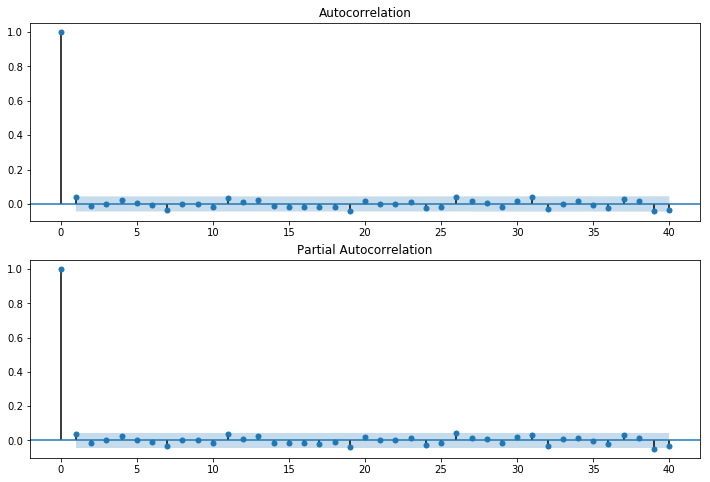

autocorrelation: [  1.00000000e+00   3.88956586e-02  -1.27107166e-02  -1.87121182e-03
   2.57412476e-02   4.87510993e-03  -7.17329648e-03  -3.25925063e-02
   6.82812566e-04   5.80513666e-04  -1.61784799e-02]
Ljung Box q statistic: [ 3.03028541  3.35405694  3.36107734  4.69028463  4.73798481  4.84131006
  6.97544702  6.97638417  6.97706189  7.50370501]
one-tailed p-value: [0.081723639788411018, 0.18692861571470631, 0.33923188257387138, 0.32057690504749936, 0.44868614887036773, 0.43567833578678911, 0.43144078349183557, 0.4608172199869639, 0.36049229659412219, 0.32281136480828393]


D:\Softwares\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


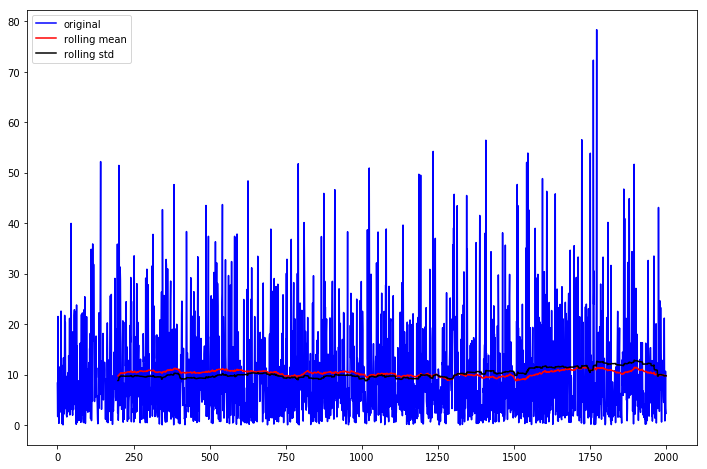

Test Statistic                  -42.975524
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1999.000000
Critical Value (1%)              -3.433625
Critical Value (5%)              -2.862987
Critical Value (10%)             -2.567540
dtype: float64


In [178]:
xt = obs_expon
autocorrelation_independency_unitroot_check(xt)

xt is independent and do not has a unit root

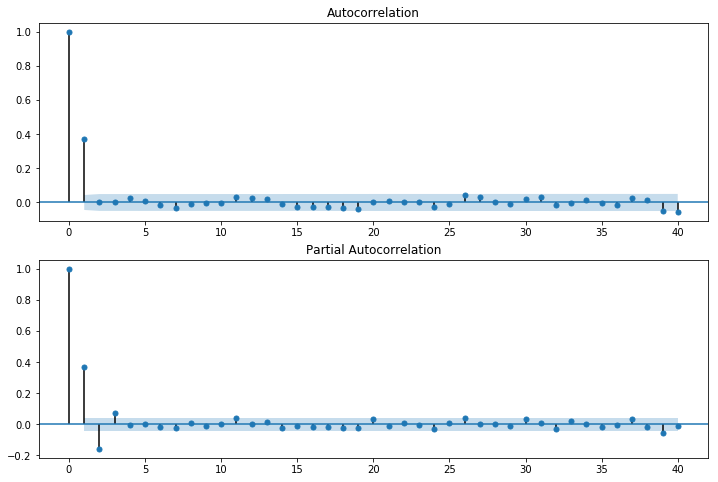

autocorrelation: [  1.00000000e+00   3.69241772e-01   2.83635539e-05   2.50595208e-03
   2.58701560e-02   1.07381447e-02  -1.63208196e-02  -3.37909812e-02
  -1.01821937e-02  -4.76353758e-03  -3.94713525e-03]
Ljung Box q statistic: [ 272.95185658  272.95185819  272.96444295  274.30632726  274.53763663
  275.07224594  277.36507752  277.57336892  277.61897954  277.65031161]
one-tailed p-value: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


D:\Softwares\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


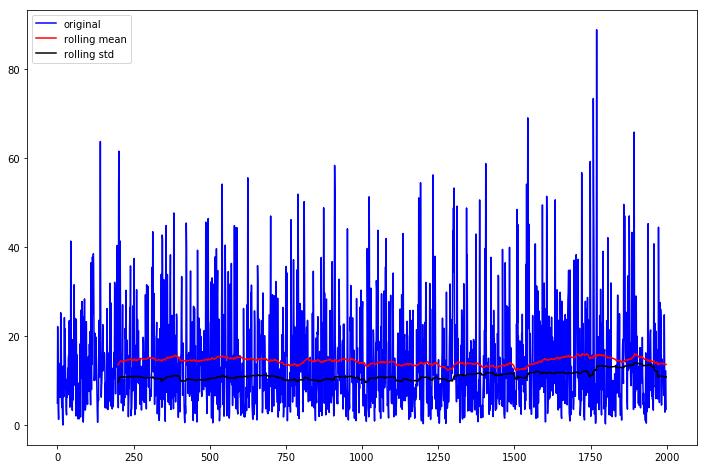

Test Statistic                  -22.818631
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    1996.000000
Critical Value (1%)              -3.433630
Critical Value (5%)              -2.862989
Critical Value (10%)             -2.567541
dtype: float64


In [179]:
yt0 = gen_hybrid_time_series(xt,0)
autocorrelation_independency_unitroot_check(yt0)

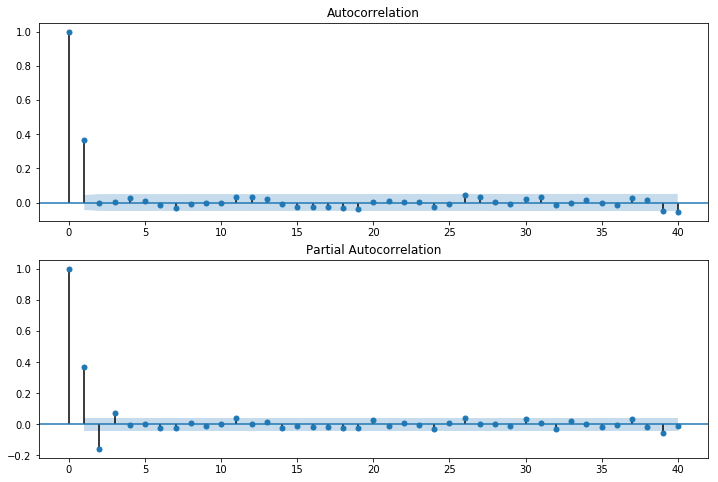

autocorrelation: [  1.00000000e+00   3.68995012e-01   1.71510421e-05   2.13336122e-03
   2.56564079e-02   1.07556806e-02  -1.70859869e-02  -3.42354618e-02
  -1.01360931e-02  -4.35399200e-03  -4.05091893e-03]
Ljung Box q statistic: [ 272.58715672  272.58715731  272.59627801  273.91607972  274.14814519
  274.73405763  277.08760492  277.29401448  277.33211949  277.36512088]
one-tailed p-value: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


D:\Softwares\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


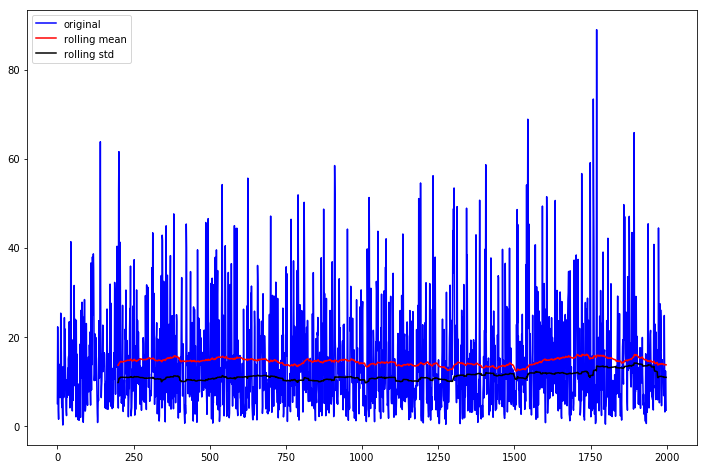

Test Statistic                  -22.831539
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    1996.000000
Critical Value (1%)              -3.433630
Critical Value (5%)              -2.862989
Critical Value (10%)             -2.567541
dtype: float64


In [181]:
yt1 = gen_hybrid_time_series(xt,0.1)
autocorrelation_independency_unitroot_check(yt1)

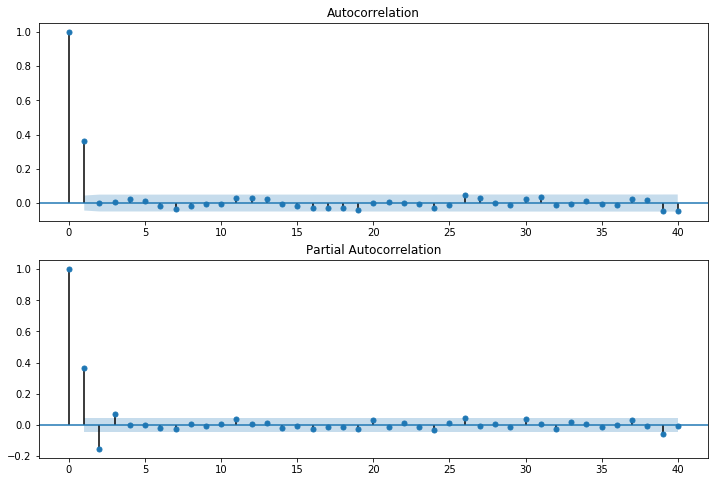

autocorrelation: [  1.00000000e+00   3.65142397e-01  -4.36598280e-04   3.97404489e-03
   2.62877339e-02   9.79415079e-03  -1.63502247e-02  -3.50250856e-02
  -1.66692234e-02  -7.65936814e-03  -3.97462878e-03]
Ljung Box q statistic: [ 266.92479847  266.92518028  266.95682964  268.34238309  268.5348111
  269.07134855  271.53471464  272.09295259  272.21087401  272.24264408]
one-tailed p-value: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


D:\Softwares\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


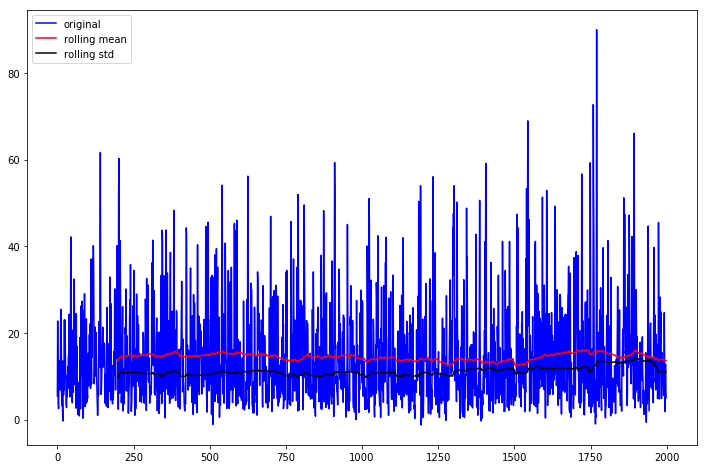

Test Statistic                  -22.831083
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    1996.000000
Critical Value (1%)              -3.433630
Critical Value (5%)              -2.862989
Critical Value (10%)             -2.567541
dtype: float64


In [182]:
yt2 = gen_hybrid_time_series(xt,1)
autocorrelation_independency_unitroot_check(yt2)

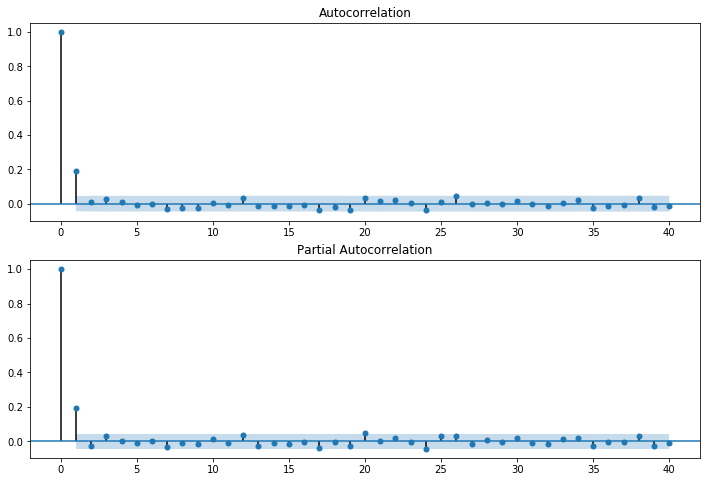

autocorrelation: [ 1.          0.19232639  0.01121018  0.02926424  0.01118929 -0.00907248
 -0.00445739 -0.03327282 -0.02266939 -0.02224934  0.00646159]
Ljung Box q statistic: [ 74.05291375  74.30462744  76.02085127  76.2718793   76.43699432
  76.47687047  78.69992303  79.73237141  80.72741248  80.81137856]
one-tailed p-value: [0.0, 1.1102230246251565e-16, 2.2204460492503131e-16, 1.1102230246251565e-15, 4.6629367034256575e-15, 1.9095836023552692e-14, 2.5313084961453569e-14, 5.5289106626332796e-14, 1.1590728377086634e-13, 3.4805491821998658e-13]


D:\Softwares\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


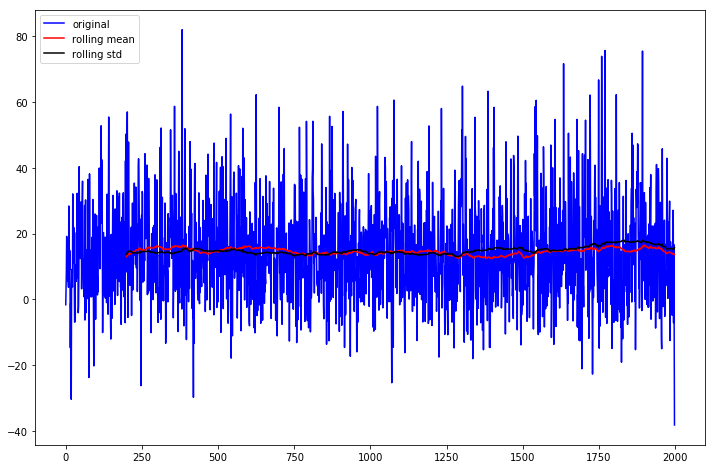

Test Statistic                  -36.615660
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1998.000000
Critical Value (1%)              -3.433627
Critical Value (5%)              -2.862988
Critical Value (10%)             -2.567541
dtype: float64


In [183]:
yt3 = gen_hybrid_time_series(xt,10)
autocorrelation_independency_unitroot_check(yt3)

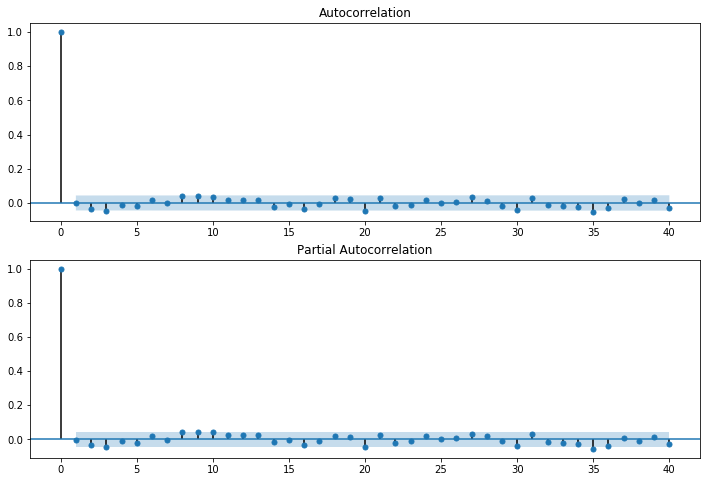

autocorrelation: [ 1.         -0.00259711 -0.03625466 -0.04530756 -0.01008374 -0.01882324
  0.0200012  -0.00227503  0.04345297  0.04202723  0.03669171]
Ljung Box q statistic: [  1.35034850e-02   2.64625232e+00   6.76002932e+00   6.96390267e+00
   7.67466372e+00   8.47756986e+00   8.48796293e+00   1.22813541e+01
   1.58316812e+01   1.85391348e+01]
one-tailed p-value: [0.092509526734801395, 0.26630149848911966, 0.07995278059424793, 0.13780814446015199, 0.1751005166419326, 0.20516015364758156, 0.29153584055954851, 0.13908510937037621, 0.0704808142918395, 0.046522225154795427]


D:\Softwares\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
D:\Softwares\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


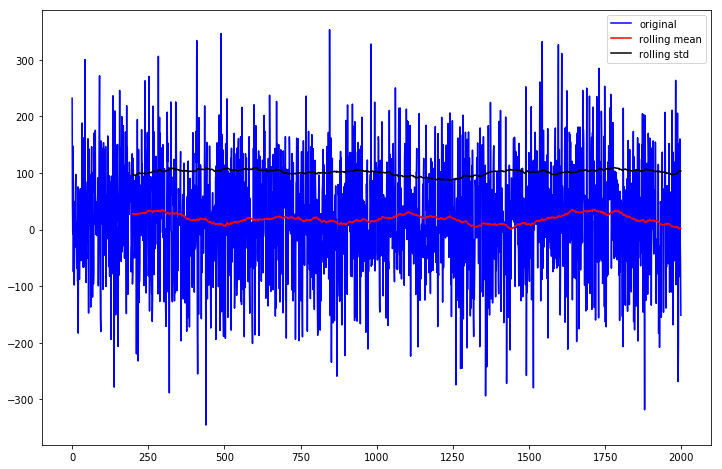

Test Statistic                  -44.811330
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1998.000000
Critical Value (1%)              -3.433627
Critical Value (5%)              -2.862988
Critical Value (10%)             -2.567541
dtype: float64


In [184]:
yt4 = gen_hybrid_time_series(xt,100)
autocorrelation_independency_unitroot_check(yt4)

In [188]:
from statsmodels.tsa.stattools import acf
acorrs = [acf(yt0,nlags=1)[1], acf(yt1,nlags=1)[1], acf(yt2,nlags=1)[1], acf(yt3,nlags=1)[1],
         acf(yt4,nlags=1)[1]]
sigmas = [0,0.1,1,10,100]
df = pd.DataFrame()
df['sigma'] = sigmas
df['1st_autocorr']=acorrs
print(df)

   sigma  1st_autocorr
0    0.0      0.369242
1    0.1      0.368995
2    1.0      0.365142
3   10.0      0.192326
4  100.0     -0.002597


conclusion1: no matter how great the variance of white noise is, yt does not have a unitroot which indicates that it do not seems like a random walk.

conclusion2: The autocorrelation of 1 lag is positive with no white noise, and it decreases to 0 as far as variance of white noise increases.

## Problem 2

Choose an equity with a long enough

history and download the following data:

* Daily data for the past three years.
* Weekly data for the past 5 years.
* Monthly data for the past 10 years.
* Monthly data for the past 20 years (this will be used to calculate quarterly returns).

Calculate simple and continuously compounded returns for each dataset.
Then construct four dataframes with 3 columns each (Price, SimpleRe-
turn and LogReturn) and print the beginning of their content with the
command head.

In [254]:
import datetime
def preprocess_wrds_data(df):
    df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(str(x),"%Y%m%d"))
#     print(df.head())
    df.index = df.date
    df.drop(['date'],axis=1,inplace=True)
    df['simple_return'] = (df.PRC-df.PRC.shift(1))/df.PRC.shift(1)
    df['log_return'] = np.log(df.PRC/df.PRC.shift(1))
#     spdf = df.totval
#     print(spdf.head())

In [255]:
df_3y_d = pd.read_csv('NVDA_3yr_d.csv')
print(df_3y_d.head())
preprocess_wrds_data(df_3y_d)
print(df_3y_d.head())

   PERMNO      date     PRC      RETX    sprtrn
0   86580  20150102  20.130  0.003990 -0.000340
1   86580  20150105  19.790 -0.016890 -0.018278
2   86580  20150106  19.190 -0.030318 -0.008893
3   86580  20150107  19.135 -0.002866  0.011630
4   86580  20150108  19.860  0.037889  0.017888
            PERMNO     PRC      RETX    sprtrn  simple_return  log_return
date                                                                     
2015-01-02   86580  20.130  0.003990 -0.000340            NaN         NaN
2015-01-05   86580  19.790 -0.016890 -0.018278      -0.016890   -0.017034
2015-01-06   86580  19.190 -0.030318 -0.008893      -0.030318   -0.030787
2015-01-07   86580  19.135 -0.002866  0.011630      -0.002866   -0.002870
2015-01-08   86580  19.860  0.037889  0.017888       0.037889    0.037189


In [256]:
df_5y_d = pd.read_csv("NVDA_5yr_d.csv")
preprocess_wrds_data(df_5y_d)
print(df_5y_d.head())
take_last = lambda array_like: array_like[-1]
df_5y_w = df3y.resample("W").apply(lambda array_like: array_like[-1])
df_5y_w['simple_return']=(df_5y_w.PRC-df_5y_w.PRC.shift(1))/df_5y_w.PRC.shift(1)
df_5y_w['log_return']=np.log(df_5y_w.PRC / df_5y_w.PRC.shift(1))
print(df_5y_w.head())

            PERMNO      PRC      RETX    sprtrn  simple_return  log_return
date                                                                      
2013-01-02   86580  12.7200  0.037520  0.025403            NaN         NaN
2013-01-03   86580  12.7300  0.000786 -0.002086       0.000786    0.000786
2013-01-04   86580  13.1500  0.032993  0.004865       0.032993    0.032460
2013-01-07   86580  12.7700 -0.028897 -0.003123      -0.028897   -0.029323
2013-01-08   86580  12.4915 -0.021809 -0.003242      -0.021809   -0.022050
            PERMNO    PRC      RETX    sprtrn  simple_return  log_return
date                                                                    
2013-01-06   86580  13.15  0.032993  0.004865            NaN         NaN
2013-01-13   86580  12.21 -0.001635 -0.000048      -0.071483   -0.074166
2013-01-20   86580  12.17 -0.006531  0.003403      -0.003276   -0.003281
2013-01-27   86580  12.41  0.018048  0.005445       0.019721    0.019529
2013-02-03   86580  12.37  0.008972  

In [257]:
df_10y_m = pd.read_csv("NVDA_10yr_m.csv")
print(df_10y_m.head())
preprocess_wrds_data(df_10y_m)
print(df_10y_m.head())

   PERMNO      date     PRC  ALTPRC  ALTPRCDT
0   86580  20070131  30.650  30.650  20070131
1   86580  20070228  31.000  31.000  20070228
2   86580  20070330  28.780  28.780  20070330
3   86580  20070430  32.890  32.890  20070430
4   86580  20070531  34.639  34.639  20070531
            PERMNO     PRC  ALTPRC  ALTPRCDT  simple_return  log_return
date                                                                   
2007-01-31   86580  30.650  30.650  20070131            NaN         NaN
2007-02-28   86580  31.000  31.000  20070228       0.011419    0.011355
2007-03-30   86580  28.780  28.780  20070330      -0.071613   -0.074307
2007-04-30   86580  32.890  32.890  20070430       0.142808    0.133488
2007-05-31   86580  34.639  34.639  20070531       0.053177    0.051812


In [258]:
df_20y_m = pd.read_csv("NVDA_20yr_m.csv")
print(df_20y_m.head())
preprocess_wrds_data(df_20y_m)
print(df_20y_m.head())

   PERMNO      date      PRC   ALTPRC  ALTPRCDT
0   86580  19981231      NaN  19.6875  19990122
1   86580  19990129  19.0000  19.0000  19990129
2   86580  19990226  21.9375  21.9375  19990226
3   86580  19990331  21.1250  21.1250  19990331
4   86580  19990430  18.2500  18.2500  19990430
            PERMNO      PRC   ALTPRC  ALTPRCDT  simple_return  log_return
date                                                                     
1998-12-31   86580      NaN  19.6875  19990122            NaN         NaN
1999-01-29   86580  19.0000  19.0000  19990129            NaN         NaN
1999-02-26   86580  21.9375  21.9375  19990226       0.154605    0.143759
1999-03-31   86580  21.1250  21.1250  19990331      -0.037037   -0.037740
1999-04-30   86580  18.2500  18.2500  19990430      -0.136095   -0.146292


For each of the eight return time series, perform the following proce-
dures:

(a) Calculate the ACF for each time series. Turn in the four plots for
each return type side by side. Label each plot accordingly.

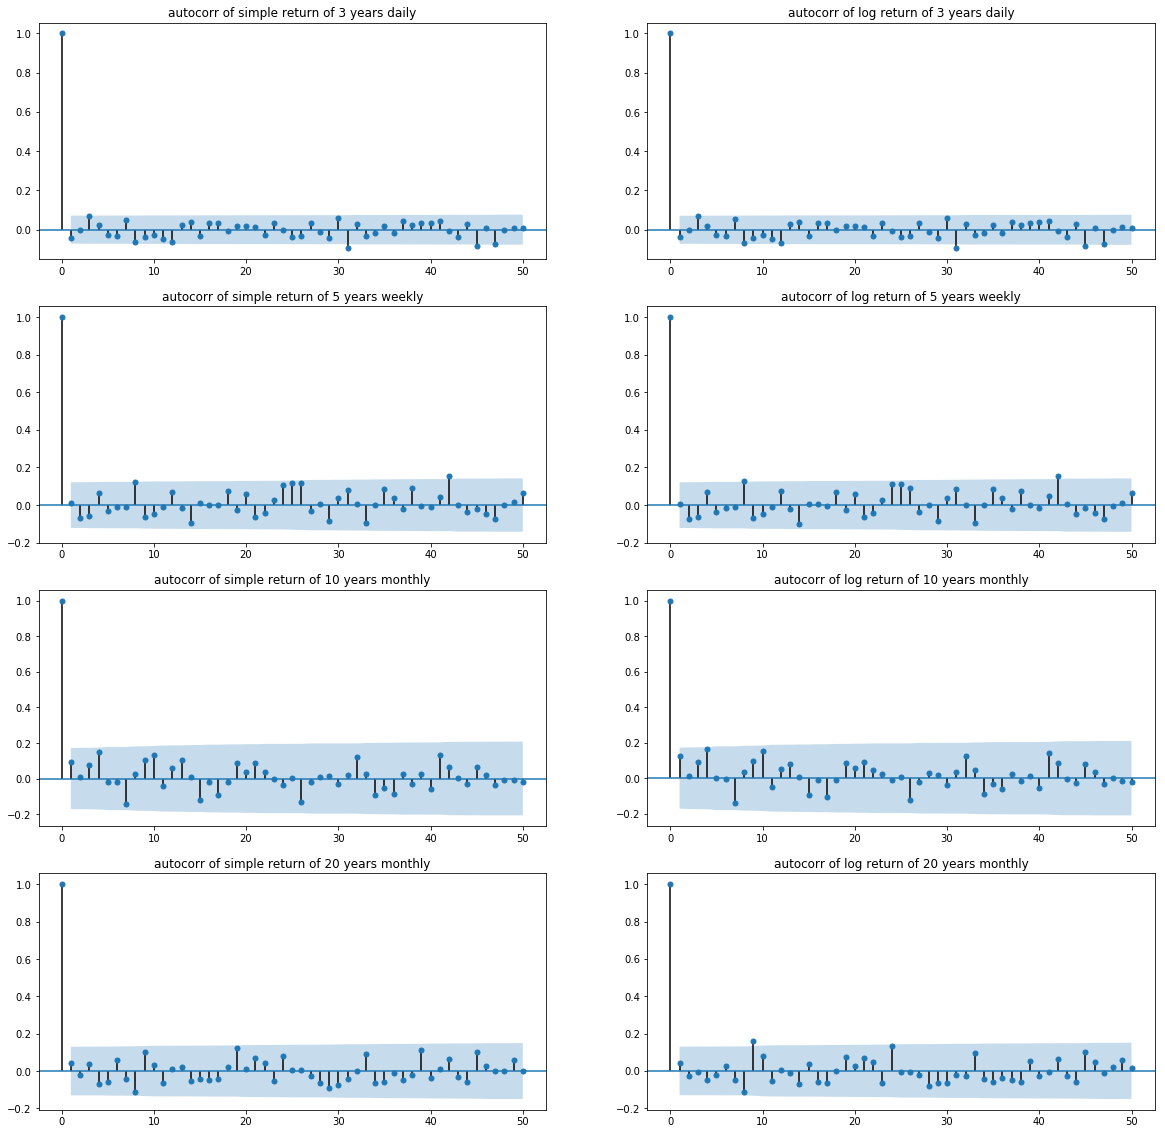

In [276]:
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm

acf3ys = acf(df_3y_d.simple_return.dropna(axis=0,inplace=False))
acf3yl = acf(df_3y_d.log_return.dropna(axis=0,inplace=False))
acf5ys = acf(df_5y_w.simple_return.dropna(axis=0,inplace=False))
acf5yl = acf(df_5y_w.log_return.dropna(axis=0,inplace=False))
acf10ys = acf(df_10y_m.simple_return.dropna(axis=0,inplace=False))
acf10yl = acf(df_10y_m.log_return.dropna(axis=0,inplace=False))
acf20ys = acf(df_20y_m.simple_return.dropna(axis=0,inplace=False))
acf20yl = acf(df_20y_m.log_return.dropna(axis=0,inplace=False))
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(421)
fig = sm.graphics.tsa.plot_acf(df_3y_d.simple_return.dropna(axis=0,inplace=False),lags=50,ax=ax1,
                               title="autocorr of simple return of 3 years daily")
ax2 = fig.add_subplot(422)
fig = sm.graphics.tsa.plot_acf(df_3y_d.log_return.dropna(axis=0,inplace=False),lags=50,ax=ax2,
                              title="autocorr of log return of 3 years daily")
ax1 = fig.add_subplot(423)
fig = sm.graphics.tsa.plot_acf(df_5y_w.simple_return.dropna(axis=0,inplace=False),lags=50,ax=ax1,
                               title="autocorr of simple return of 5 years weekly")
ax2 = fig.add_subplot(424)
fig = sm.graphics.tsa.plot_acf(df_5y_w.log_return.dropna(axis=0,inplace=False),lags=50,ax=ax2,
                              title="autocorr of log return of 5 years weekly")
ax1 = fig.add_subplot(425)
fig = sm.graphics.tsa.plot_acf(df_10y_m.simple_return.dropna(axis=0,inplace=False),lags=50,ax=ax1,
                               title="autocorr of simple return of 10 years monthly")
ax2 = fig.add_subplot(426)
fig = sm.graphics.tsa.plot_acf(df_10y_m.log_return.dropna(axis=0,inplace=False),lags=50,ax=ax2,
                              title="autocorr of log return of 10 years monthly")
ax1 = fig.add_subplot(427)
fig = sm.graphics.tsa.plot_acf(df_20y_m.simple_return.dropna(axis=0,inplace=False),lags=50,ax=ax1,
                               title="autocorr of simple return of 20 years monthly")
ax2 = fig.add_subplot(428)
fig = sm.graphics.tsa.plot_acf(df_20y_m.log_return.dropna(axis=0,inplace=False),lags=50,ax=ax2,
                              title="autocorr of log return of 20 years monthly")
plt.show()

(b) Perform the Portmanteau Ljung&Box test with as much lag as
you feel is necessary.

In [284]:
ljung_box_q_test(df_3y_d.simple_return.dropna(axis=0,inplace=False),m=10)
ljung_box_q_test(df_3y_d.log_return.dropna(axis=0,inplace=False),m=10)
print("**************************************************************************************************")
ljung_box_q_test(df_5y_w.simple_return.dropna(axis=0,inplace=False),m=10)
ljung_box_q_test(df_5y_w.log_return.dropna(axis=0,inplace=False),m=10)
print("**************************************************************************************************")
ljung_box_q_test(df_10y_m.simple_return.dropna(axis=0,inplace=False),m=10)
ljung_box_q_test(df_10y_m.log_return.dropna(axis=0,inplace=False),m=10)
print("**************************************************************************************************")
ljung_box_q_test(df_20y_m.simple_return.dropna(axis=0,inplace=False),m=10)
ljung_box_q_test(df_20y_m.log_return.dropna(axis=0,inplace=False),m=10)

autocorrelation: [ 1.         -0.03990552 -0.0032686   0.06894479  0.02250864 -0.02747553
 -0.02994263  0.0507622  -0.06216868 -0.03859024 -0.02612522]
Ljung Box q statistic: [  1.2054914    1.21358979   4.82150374   5.20656549   5.78108322
   6.46432031   8.43063666  11.38386859  12.52330926  13.04623517]
one-tailed p-value: [0.27222688109693816, 0.4549048410540012, 0.18534393465301524, 0.26675158616611649, 0.32810664001619116, 0.37323237029112444, 0.29615534398626031, 0.18088265173195872, 0.18538842371753195, 0.22109823756940039]
autocorrelation: [ 1.         -0.03758476 -0.00293974  0.0682893   0.0194679  -0.02767139
 -0.03025393  0.05397077 -0.06526339 -0.03986245 -0.02577275]
Ljung Box q statistic: [  1.06935469   1.07590546   4.615541     4.9035924    5.48633027
   6.18384804   8.4065934   11.6611627   12.8769703   13.38588133]
one-tailed p-value: [0.30109125140929838, 0.41605748331579551, 0.2022129430140841, 0.29733332379111421, 0.35944714535815414, 0.4029137890310508, 0.2981089

Conclusion: All return series are supposed to be independent under 1% significence level

(c) For the famous Capital Asset Pricing Model (CAPM) to be valid,
there should be no serial correlation between successive returns
(data should be uncorrelated). Does this assumption appear to
be valid based on your dataset? Compare the validity of this
assumption using the various time frequencies.

From (a) and (b), we know the autocorrelations and Ljung Box p-value. Based on these results, rughly speaking, CAPM is correct. However, one can see the absolute value of autocorrelations are becoming higher when we increase the period of sampling, which conflicts with the iid assumption. Just note that, autocorrelation itself may not be independent. So we need more sophisticated model to capture the dynamics of it.

Then test the normality of each of the time series:

(d) Do a normal qqplot for each of the time series. Turn in the four
plots for each return type side by side. Label each plot accordingly.

(e) Comment on the plots.

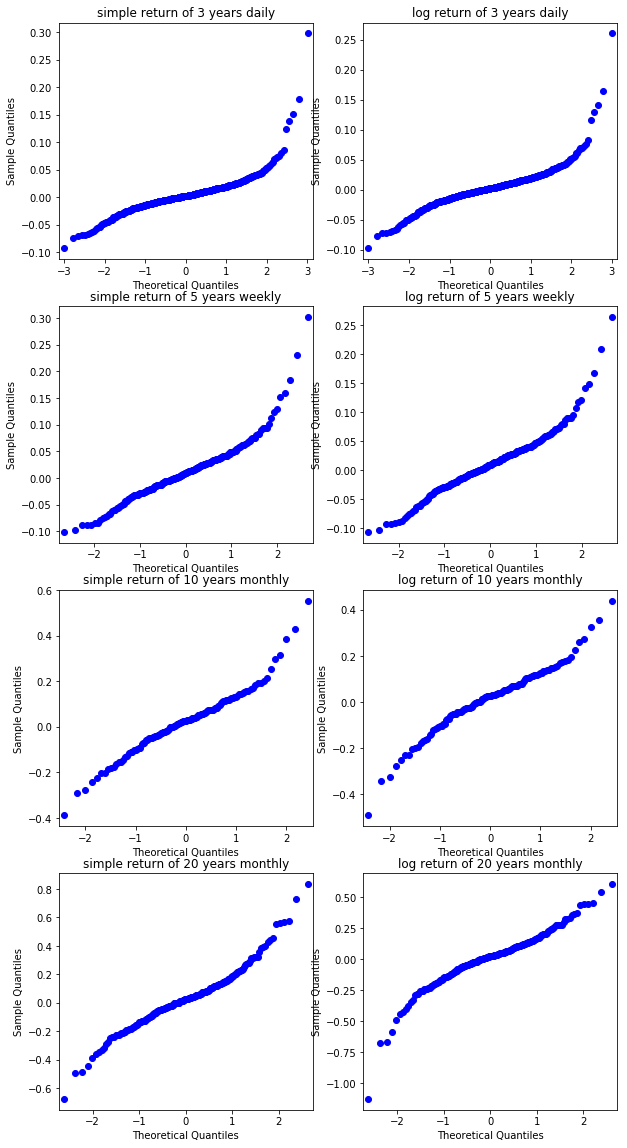

In [296]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(421)
fig = sm.qqplot(df_3y_d.simple_return.dropna(axis=0,inplace=False),ax=ax1)
ax1.set_title("simple return of 3 years daily")

ax2 = fig.add_subplot(422)
fig = sm.qqplot(df_3y_d.log_return.dropna(axis=0,inplace=False),ax=ax2)

ax2.set_title("log return of 3 years daily")

ax3 = fig.add_subplot(423)
fig = sm.qqplot(df_5y_w.simple_return.dropna(axis=0,inplace=False),ax=ax3)
ax3.set_title("simple return of 5 years weekly")

ax4 = fig.add_subplot(424)
fig = sm.qqplot(df_5y_w.log_return.dropna(axis=0,inplace=False),ax=ax4)
ax4.set_title("log return of 5 years weekly")

ax5 = fig.add_subplot(425)
fig = sm.qqplot(df_10y_m.simple_return.dropna(axis=0,inplace=False),ax=ax5)
ax5.set_title("simple return of 10 years monthly")

ax6 = fig.add_subplot(426)
fig = sm.qqplot(df_10y_m.log_return.dropna(axis=0,inplace=False),ax=ax6)
ax6.set_title("log return of 10 years monthly")

ax7 = fig.add_subplot(427)
fig = sm.qqplot(df_20y_m.simple_return.dropna(axis=0,inplace=False),ax=ax7)
ax7.set_title("simple return of 20 years monthly")

ax8 = fig.add_subplot(428)
fig = sm.qqplot(df_20y_m.log_return.dropna(axis=0,inplace=False),ax=ax8)
ax8.set_title("log return of 20 years monthly")
plt.show()

(f) Test if return distributions are skewed. Summarize and comment.

From the q-q plot, the daily and weekly returns are both right skewed. The monthly return of 20 years data are left skewed. Others are less clear, as a result, we quantify the value.

In [300]:
skew = []
skew.append(sp.stats.skew(df_3y_d.simple_return.dropna(axis=0,inplace=False)))
skew.append(sp.stats.skew(df_3y_d.log_return.dropna(axis=0,inplace=False)))
skew.append(sp.stats.skew(df_5y_w.simple_return.dropna(axis=0,inplace=False)))
skew.append(sp.stats.skew(df_5y_w.log_return.dropna(axis=0,inplace=False)))
skew.append(sp.stats.skew(df_10y_m.simple_return.dropna(axis=0,inplace=False)))
skew.append(sp.stats.skew(df_10y_m.log_return.dropna(axis=0,inplace=False)))
skew.append(sp.stats.skew(df_20y_m.simple_return.dropna(axis=0,inplace=False)))
skew.append(sp.stats.skew(df_20y_m.log_return.dropna(axis=0,inplace=False)))
print("skewness:",skew)

skewness: [2.7995748447758304, 2.078745634552496, 1.319815386064654, 0.9223269707541405, 0.35987390230847616, -0.3900674537575176, 0.4242422740837204, -1.013550046906922]


(g) Test if return distributions are leptokurtic. Summarize and com-
ment.

Surly all the return series are leptokurtic (fat-tailed) from q-q plots. We quantify it as follows:

In [302]:
kurtosis = []
kurtosis.append(sp.stats.kurtosis(df_3y_d.simple_return.dropna(axis=0,inplace=False)))
kurtosis.append(sp.stats.kurtosis(df_3y_d.log_return.dropna(axis=0,inplace=False)))
kurtosis.append(sp.stats.kurtosis(df_5y_w.simple_return.dropna(axis=0,inplace=False)))
kurtosis.append(sp.stats.kurtosis(df_5y_w.log_return.dropna(axis=0,inplace=False)))
kurtosis.append(sp.stats.kurtosis(df_10y_m.simple_return.dropna(axis=0,inplace=False)))
kurtosis.append(sp.stats.kurtosis(df_10y_m.log_return.dropna(axis=0,inplace=False)))
kurtosis.append(sp.stats.kurtosis(df_20y_m.simple_return.dropna(axis=0,inplace=False)))
kurtosis.append(sp.stats.kurtosis(df_20y_m.log_return.dropna(axis=0,inplace=False)))
print("kurtosis:",kurtosis)

kurtosis: [27.856972646838468, 19.82654671497985, 5.919559388482298, 4.0710888398788425, 2.0959257257694617, 1.8745580970991185, 2.2967513796494377, 4.925863001170831]


(h) Finally, test for normality of the returns. Perform a Jarque-Bera
test as well as a Shapiro-Wilks test to check normality for each of
the data under consideration. What do you conclude? Explain.

In [303]:
def normality_test(array_like):
    jbvalue,jbp = sp.stats.jarque_bera(array_like)
    swvalue,swp = sp.stats.shapiro(array_like)
    print("Jarque Bera statistic:",jbvalue)
    print("Jarque Bera p-value:",jbp)
    print("Shapiro statistic:",swvalue)
    print("Shapiro p-value:",swp)

In [306]:
normality_test(df_3y_d.simple_return.dropna(axis=0,inplace=False))
normality_test(df_3y_d.log_return.dropna(axis=0,inplace=False))
print("****************************************************")
normality_test(df_5y_w.simple_return.dropna(axis=0,inplace=False))
normality_test(df_5y_w.log_return.dropna(axis=0,inplace=False))
print("****************************************************")
normality_test(df_10y_m.simple_return.dropna(axis=0,inplace=False))
normality_test(df_10y_m.log_return.dropna(axis=0,inplace=False))
print("****************************************************")
normality_test(df_20y_m.simple_return.dropna(axis=0,inplace=False))
normality_test(df_20y_m.log_return.dropna(axis=0,inplace=False))

Jarque Bera statistic: 25364.6040554
Jarque Bera p-value: 0.0
Shapiro statistic: 0.8134927153587341
Shapiro p-value: 1.2294258059430987e-28
Jarque Bera statistic: 12892.6676239
Jarque Bera p-value: 0.0
Shapiro statistic: 0.8454837799072266
Shapiro p-value: 1.8616553450928162e-26
****************************************************
Jarque Bera statistic: 455.095701309
Jarque Bera p-value: 0.0
Shapiro statistic: 0.9199478626251221
Shapiro p-value: 1.3320058944721325e-10
Jarque Bera statistic: 216.412218816
Jarque Bera p-value: 0.0
Shapiro statistic: 0.9436067938804626
Shapiro p-value: 1.893412715503473e-08
****************************************************
Jarque Bera statistic: 26.8055559615
Jarque Bera p-value: 1.51094091194e-06
Shapiro statistic: 0.9673646688461304
Shapiro p-value: 0.0030423414427787066
Jarque Bera statistic: 22.5024078277
Jarque Bera p-value: 1.29916474108e-05
Shapiro statistic: 0.9671876430511475
Shapiro p-value: 0.002931358991190791
******************************

None of them pass the test. The return series at any frequency are not normal. At least, we should not consider return as a Gaussian random variable. That is why we introduce Levy process family(e.g. generalized hyperbolic model, Merton jump, Kou) and stochastic volatility models(e.g. Heston, Heston-Nandi, GARCH family)